In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [3]:
train_original=train.copy()
test_original=test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
train['Loan_Status'].value_counts(normalize = True )

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

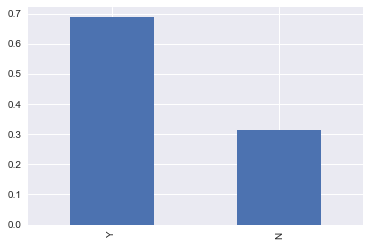

In [8]:
train['Loan_Status'].value_counts(normalize = True).plot.bar()

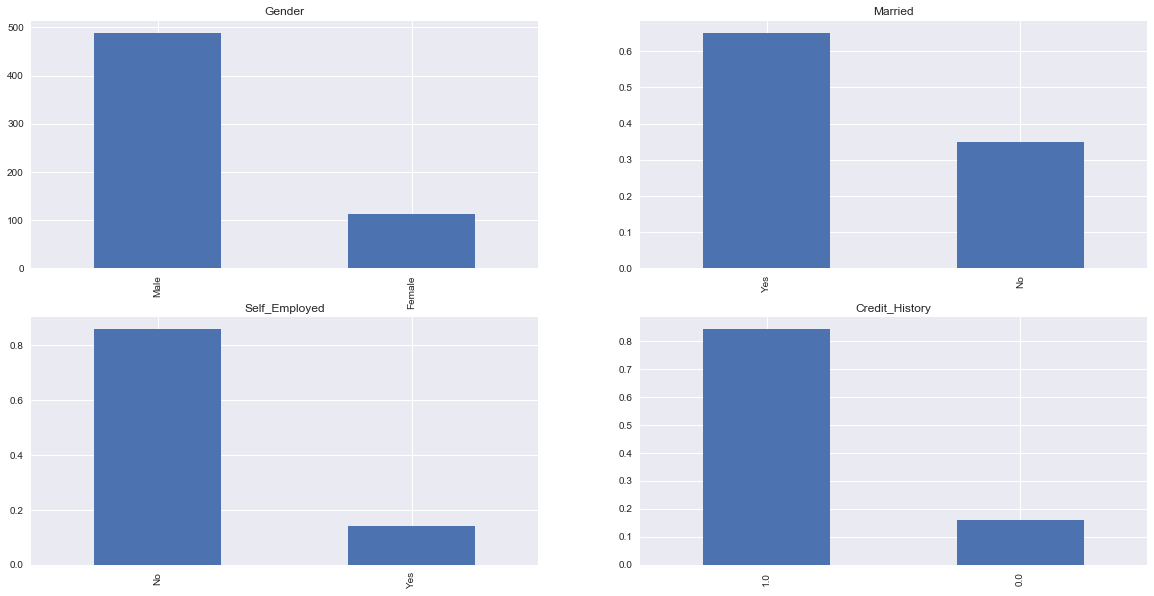

In [9]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts().plot.bar(figsize = (20,10), title= 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

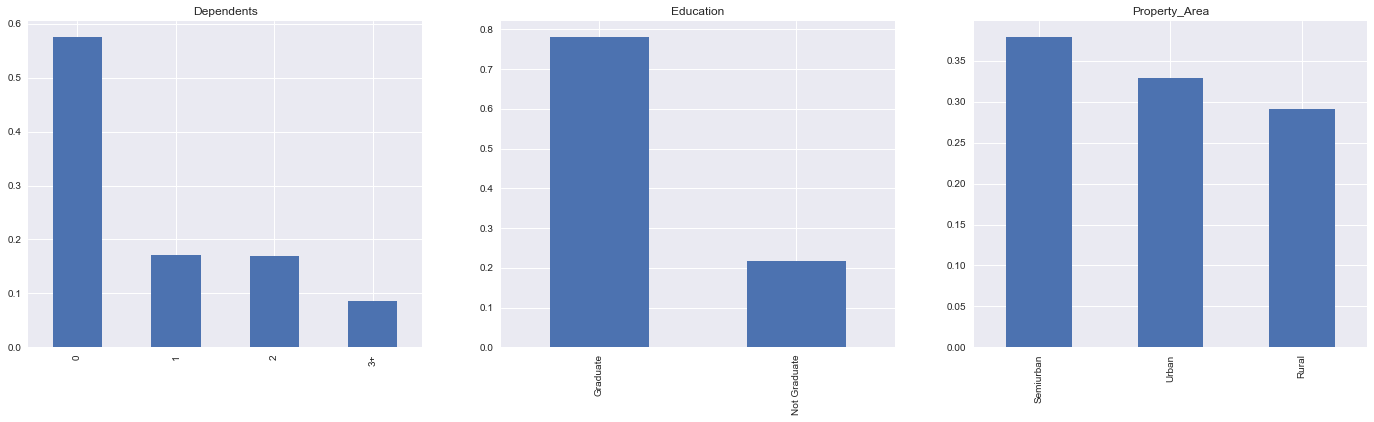

In [10]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

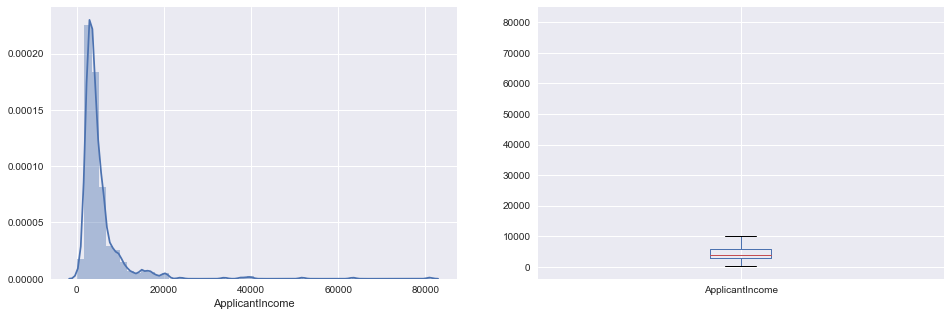

In [11]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

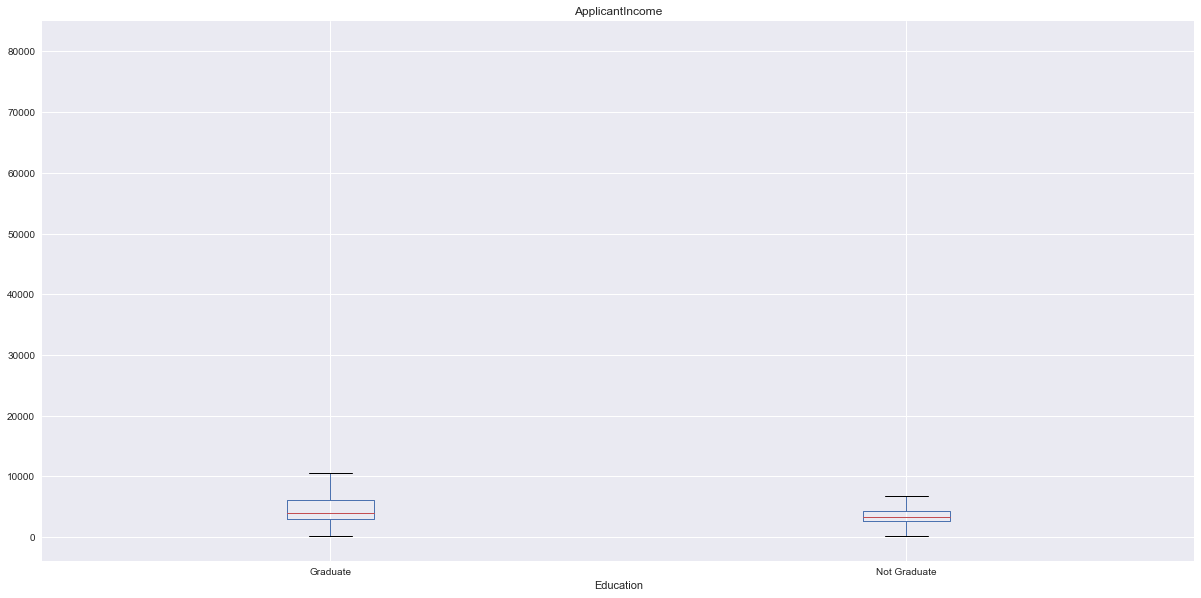

In [12]:
train.boxplot(column='ApplicantIncome', by = 'Education', figsize= (20, 10))
plt.suptitle("")


In [13]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])

In [14]:
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


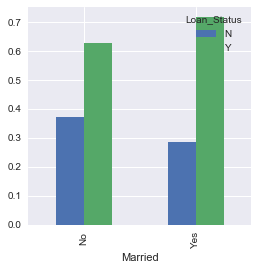

In [15]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))
plt.show()

In [16]:
Married.sum(1)

Married
No     213
Yes    398
dtype: int64

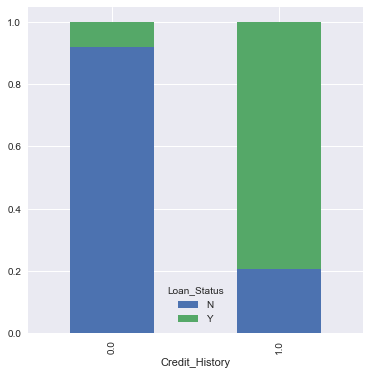

In [17]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
#Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6))
plt.show()

#Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

In [18]:
train.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [19]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
bins = [0, 3000, 4000, 6000, 81000]
group = ['Low', 'avg', 'high', 'very high']
train['Income_bin']= pd.cut(train['ApplicantIncome'], bins, labels= group)

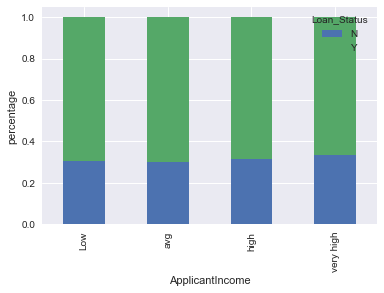

In [21]:
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis = 0).plot(kind='bar', stacked= True)
plt.xlabel('ApplicantIncome')
plt.ylabel('percentage')

In [22]:
train=train.drop(['Income_bin'],axis=1)


In [23]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

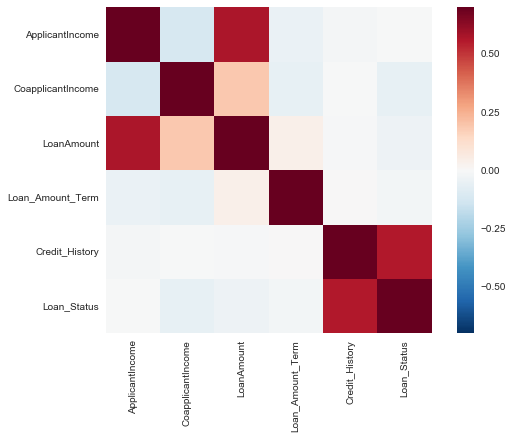

In [24]:
mat = train.corr()
f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(mat, vmax= 0.7, square= True)

In [25]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [27]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [28]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [29]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [30]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

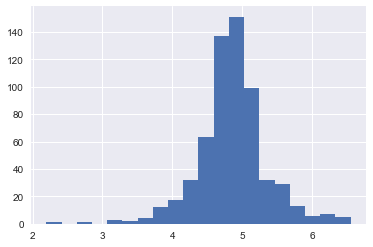

In [31]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

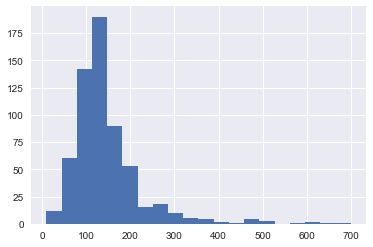

In [32]:
train['LoanAmount'].hist(bins=20)

In [33]:
train = train.drop('Loan_ID', axis =1)
test = test.drop('Loan_ID', axis =1)

In [34]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [35]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.3)

In [38]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
pred_test = model.predict(x_test)

In [121]:
accuracy_score(y_test, pred_test)

0.78918918918918923

In [122]:
pred_test = model.predict(test)

stratified k fold 


In [123]:
from sklearn.model_selection import StratifiedKFold

In [124]:
kf = StratifiedKFold(n_splits= 5, random_state= 1, shuffle= True)

In [129]:
i =1
for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr,xtest = X.loc[train_index], X.loc[test_index]
    ytr,ytest = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xtest)
    score = accuracy_score(ytest, pred_test)
    print('accuracy', score)
    i+=1

    
    


1 of kfold 5
accuracy 0.806451612903

2 of kfold 5
accuracy 0.806451612903

3 of kfold 5
accuracy 0.811475409836

4 of kfold 5
accuracy 0.795081967213

5 of kfold 5
accuracy 0.83606557377


In [131]:
pred_test = model.predict(test)
pred=model.predict_proba(xtest)[:,1]

In [132]:
from sklearn import metrics

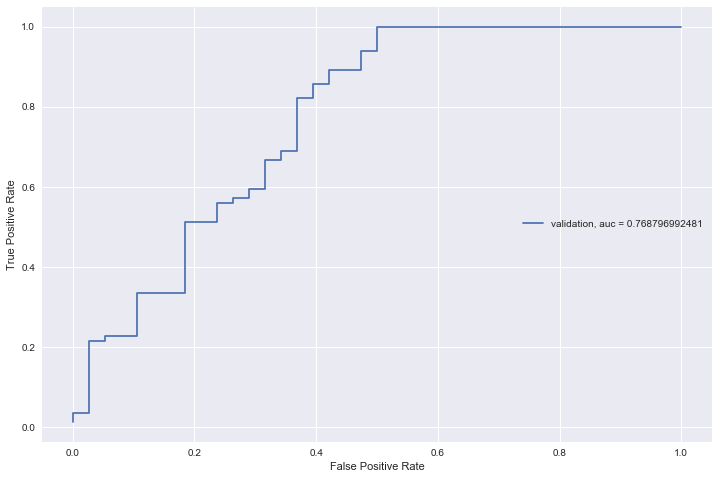

In [148]:
fpr, tpr, j = metrics.roc_curve(ytest, pred)
auc = metrics.roc_auc_score(ytest, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label = 'validation, auc = '+ str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=5)
plt.show()

In [149]:
pred

array([ 0.2420844 ,  0.81275846,  0.26182673,  0.12891654,  0.73502015,
        0.69417928,  0.86401453,  0.83160236,  0.09129827,  0.13583905,
        0.86757887,  0.87755062,  0.64137481,  0.85761335,  0.82973008,
        0.69335288,  0.89070939,  0.88653282,  0.14749943,  0.65370715,
        0.92221227,  0.69663118,  0.71677068,  0.65415897,  0.6985369 ,
        0.83446016,  0.77402645,  0.76195084,  0.69442386,  0.86078951,
        0.88365989,  0.74240869,  0.13585724,  0.64332715,  0.87762931,
        0.85217175,  0.61945174,  0.89795161,  0.84975118,  0.75086882,
        0.89661249,  0.38324803,  0.90678658,  0.6405892 ,  0.85829343,
        0.59466341,  0.85262279,  0.75978998,  0.86131026,  0.83436836,
        0.81756257,  0.21972546,  0.83203243,  0.87111423,  0.62565995,
        0.73829394,  0.87904168,  0.69525811,  0.76090772,  0.87941975,
        0.64016911,  0.65836792,  0.75031057,  0.84186078,  0.91646913,
        0.60182782,  0.06496727,  0.7044522 ,  0.6081605 ,  0.85